In [1]:
%load_ext autoreload
%autoreload 2

# Find Game Paths

In [2]:
from pathlib import Path
from npz_loader import discover_games

game_paths = discover_games(Path("dataset/"))
print("\n".join(str(p) for p in game_paths))

dataset\BeamRiderNoFrameskip-v4\BeamRiderNoFrameskip-v4
dataset\BreakoutNoFrameskip-v4\BreakoutNoFrameskip-v4
dataset\EnduroNoFrameskip-v4\EnduroNoFrameskip-v4
dataset\MsPacmanNoFrameskip-v4\MsPacmanNoFrameskip-v4
dataset\PongNoFrameskip-v4\PongNoFrameskip-v4
dataset\QbertNoFrameskip-v4\QbertNoFrameskip-v4
dataset\SeaquestNoFrameskip-v4\SeaquestNoFrameskip-v4
dataset\SpaceInvadersNoFrameskip-v4\SpaceInvadersNoFrameskip-v4


# Load NPZ Files in to Dict

In [3]:
from npz_loader import discover_game_npz_paths, get_sequences_by_game, fix_obs_paths, build_episodes_from_sequences

train_game_dirs = [
    Path(r"dataset\BeamRiderNoFrameskip-v4\BeamRiderNoFrameskip-v4"),
    Path(r"dataset\BreakoutNoFrameskip-v4\BreakoutNoFrameskip-v4"),
]

npz_paths_by_game = discover_game_npz_paths(train_game_dirs)
game_to_sequences = get_sequences_by_game(npz_paths_by_game)
sequences_by_game = fix_obs_paths(game_to_sequences, dataset_root="dataset")

In [ ]:
def print_seq(one_game_seq_list):
    one_game_seq = one_game_seq_list[0]

    print(f"Keys in one_game_seq ({type(one_game_seq)}):")

    one_row = []
    for key in one_game_seq.keys():
        arr = one_game_seq[key]
        print(f"\t{key}:")
        print(f"\t\tshape={arr.shape}")
        print(f"\t\tdtype={arr.dtype}")

        row_to_print = 10
        if len(one_game_seq[key]) > 1:
            one_row.append(f"{key}: {one_game_seq[key][row_to_print]}")
        else:
            one_row.append(f"{key}: {one_game_seq[key][0]}")
            
print(f"Loaded games:")
for game in sequences_by_game.keys():
    print(f"\t{game}")
    print(f"\t\tNumber of gameplay sequences: {len(sequences_by_game[game])}")

one_game_key = list(sequences_by_game.keys())[0]
one_game_seq_list = sequences_by_game[one_game_key]
print_seq(one_game_seq_list)

Loaded games:
	dataset\BeamRiderNoFrameskip-v4\BeamRiderNoFrameskip-v4
		Number of gameplay sequences: 200
	dataset\BreakoutNoFrameskip-v4\BreakoutNoFrameskip-v4
		Number of gameplay sequences: 200
Keys in one_game_seq (<class 'dict'>):
	model selected actions:
		shape=(548, 1)
		dtype=int64
	taken actions:
		shape=(548, 1)
		dtype=int64
	obs:
		shape=(548,)
		dtype=<U193
	rewards:
		shape=(548,)
		dtype=float64
	episode_returns:
		shape=(1,)
		dtype=float64
	episode_starts:
		shape=(548,)
		dtype=bool
	repeated:
		shape=(548,)
		dtype=bool


# Create Episodes

In [5]:
from npz_loader import build_episodes_from_sequences

episodes = build_episodes_from_sequences(sequences_by_game)

In [6]:
import random
sampled_episodes = random.sample(episodes, min(5, len(episodes)))
for episode in sampled_episodes:
    print("-" * 100)
    print(f"{'Game name:':<25} {episode.game_name}")
    print(f"{'Number of timesteps:':<25} {len(episode.timesteps)}")
    print(f"{'Observation:':<25} {episode.timesteps[0].obs}")
    print(f"{'Model selected action:':<25} {episode.timesteps[0].model_selected_action}")
    print(f"{'Taken action:':<25} {episode.timesteps[0].taken_action}")
    print(f"{'Repeated action:':<25} {episode.timesteps[0].repeated_action}")
    print(f"{'Reward:':<25} {episode.timesteps[0].reward}")
    print(f"{'RTG:':<25} {episode.timesteps[0].rtg}")

----------------------------------------------------------------------------------------------------
Game name:                BreakoutNoFrameskip-v4
Number of timesteps:      476
Observation:              dataset\BreakoutNoFrameskip-v4\BreakoutNoFrameskip-v4\BreakoutNoFrameskip-v4-recorded_images-163\0.png
Model selected action:    0
Taken action:             0
Repeated action:          False
Reward:                   0.0
RTG:                      12.0
----------------------------------------------------------------------------------------------------
Game name:                BeamRiderNoFrameskip-v4
Number of timesteps:      523
Observation:              dataset\BeamRiderNoFrameskip-v4\BeamRiderNoFrameskip-v4\BeamRiderNoFrameskip-v4-recorded_images-73\0.png
Model selected action:    8
Taken action:             8
Repeated action:          False
Reward:                   0.0
RTG:                      7.0
----------------------------------------------------------------------------------

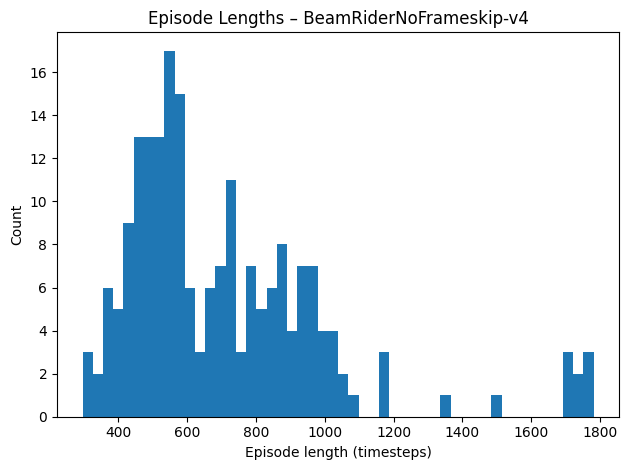

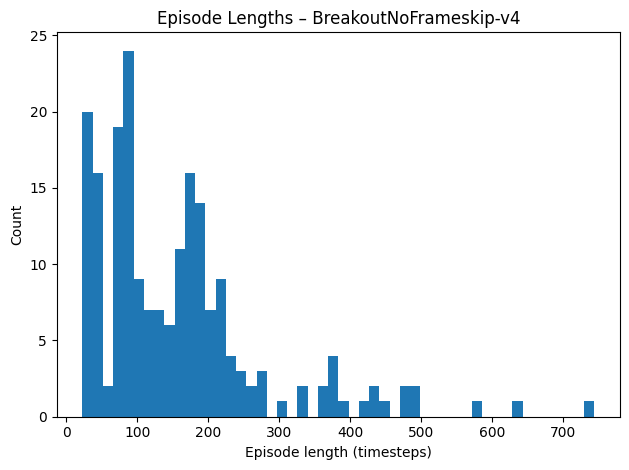

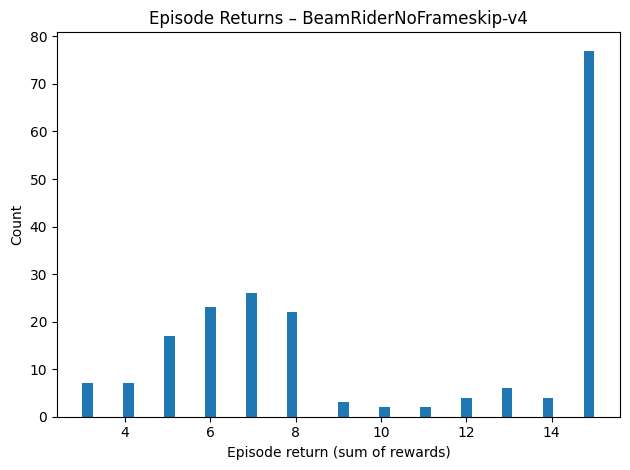

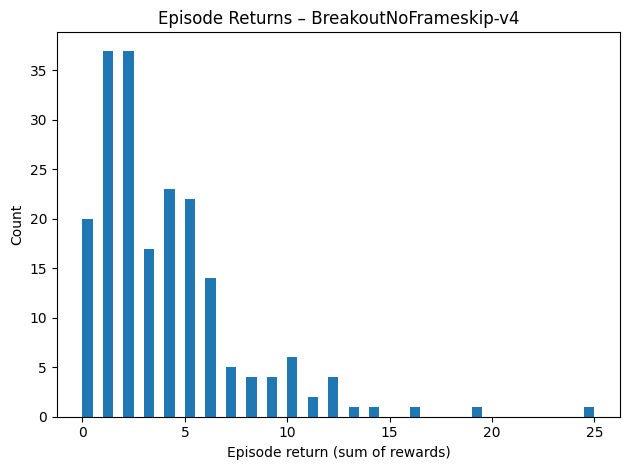

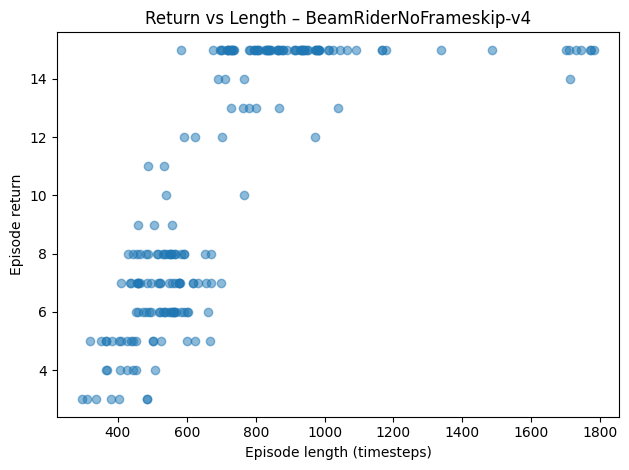

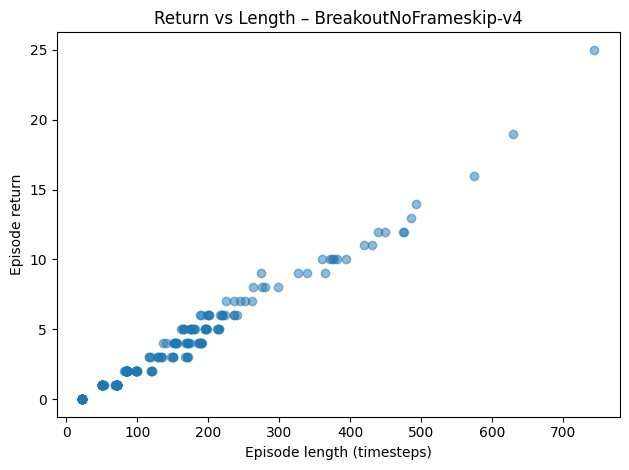

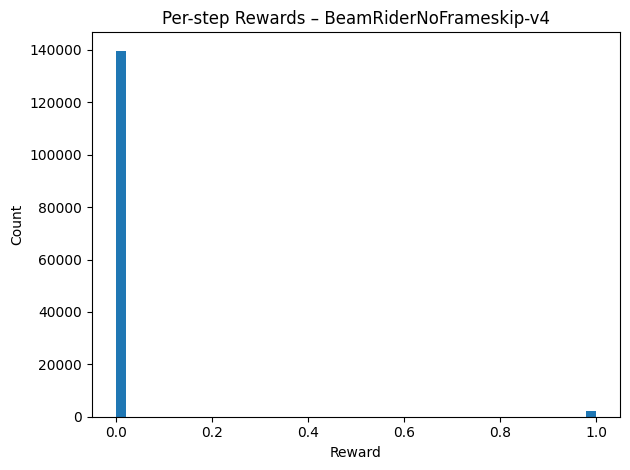

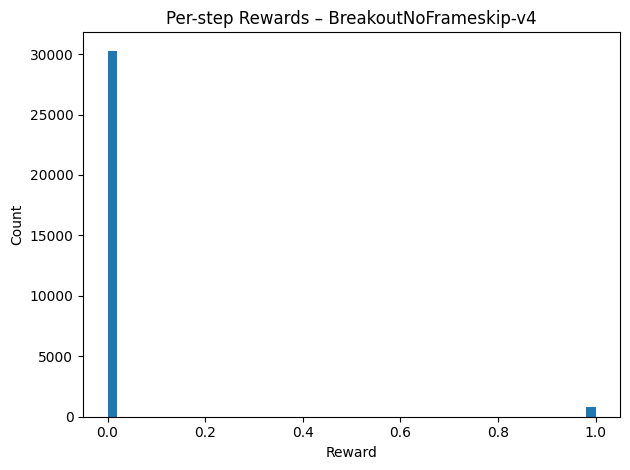

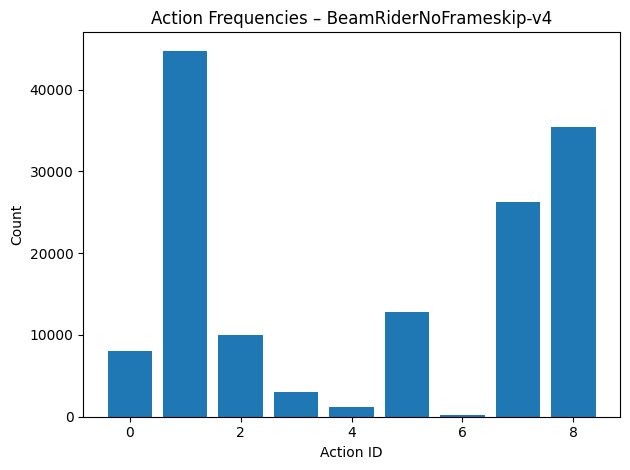

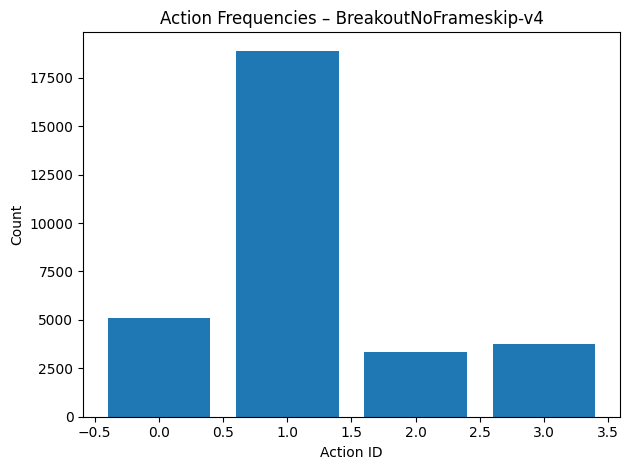

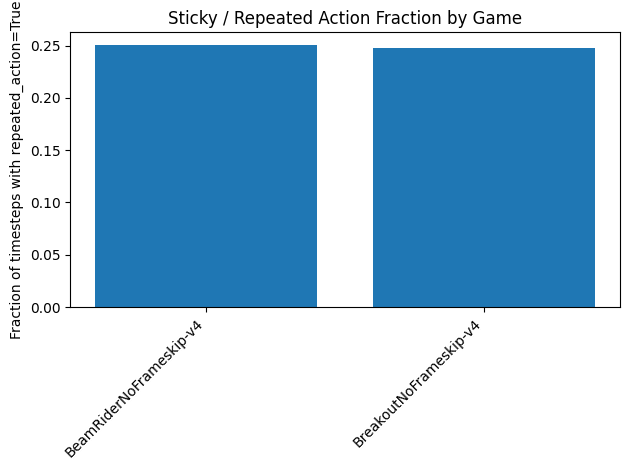

In [10]:
from episode_stats import create_all_plots

stats_by_game = create_all_plots(episodes)